<a href="https://colab.research.google.com/github/Leogrimes25/Estudo-na-Base-Cardiac-Disease/blob/main/CardiacDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlação das Features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
base_cardiac = pd.read_csv('/content/sample_data/cardiac arrest dataset.csv')
base_cardiac.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
base_cardiac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
base_cardiac.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
base_cardiac['target'].value_counts()

,count
target,
1,526
0,499


In [ ]:
target_variable = base_cardiac['target']
variables_to_correlate = ['cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

correlations_list = []

for var_name in variables_to_correlate:
  current_variable = base_cardiac[var_name]
  correlation = np.corrcoef(target_variable,current_variable)[0,1]
  correlations_list.append(correlation)

for item in correlations_list:
    print(item)


0.4348542500527374
-0.138771733737301
-0.09996559423254112
-0.041163547464651264
0.13446820873908927
0.4228954964828712
-0.4380285500558465
-0.4384412701119447
0.3455117514359987
-0.38208528903867084
-0.3378381504571857


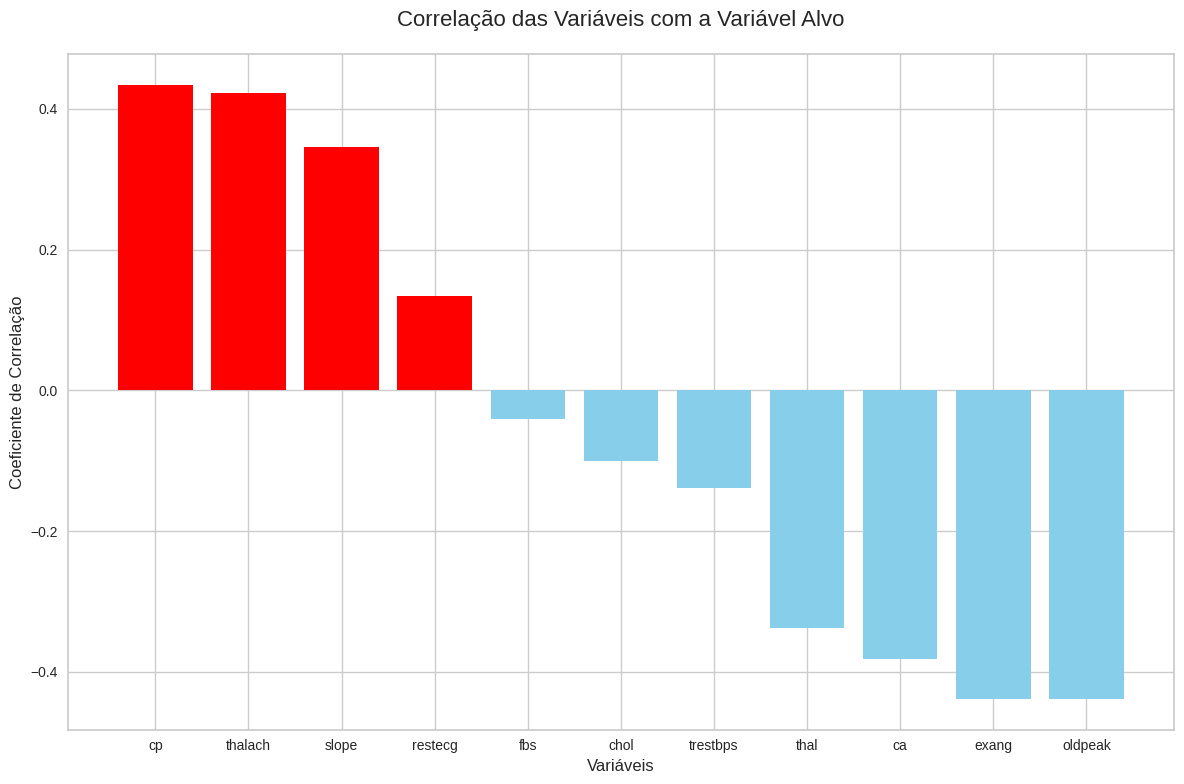

In [ ]:
X_axis = ['cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
Y_axis = [0.4348,-0.1387,-0.0999,-0.0411,0.1344,0.4228,-0.4380,-0.4384,0.3455,-0.3820,-0.3378]
df = pd.DataFrame({
    'Variavel': X_axis,
    'Correlacao': Y_axis
})

df_sorted = df.sort_values(by='Correlacao',ascending=False)
colors = ['red' if y > 0 else 'skyblue' for y in df_sorted['Correlacao']]
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(df_sorted['Variavel'], df_sorted['Correlacao'], color=colors)
ax.set_title('Correlação das Variáveis com a Variável Alvo', fontsize=16, pad=20)
ax.set_ylabel('Coeficiente de Correlação', fontsize=12)
ax.set_xlabel('Variáveis', fontsize=12)
plt.tight_layout()
plt.show()

# Best Naive Bayes


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ConfusionMatrix
from sklearn.feature_selection import SelectKBest, f_classif
base_cardiac = pd.read_csv('/content/sample_data/cardiac arrest dataset.csv')
base_cardiac.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
base_cardiac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
base_cardiac['target'].value_counts()

,count
target,
1,526
0,499


In [ ]:
X_Naive_KBest = base_cardiac.drop(columns=['target'])
Y_Naive_KBest = base_cardiac['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Naive_KBest,Y_Naive_KBest,test_size=0.3,random_state=42)

In [ ]:
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X_train,y_train)

SelectKBest(k=5)

In [ ]:
scores = pd.DataFrame({
    'Feature': X_Naive_KBest.columns,
    'Score': selector.scores_
})


scores = scores.sort_values(by='Score', ascending=True)

print(scores)

     Feature       Score
5        fbs    1.730777
3   trestbps   13.944869
6    restecg   14.204942
4       chol   14.626966
0        age   41.132190
1        sex   60.711348
10     slope   91.714505
12      thal  106.655892
11        ca  127.561465
8      exang  139.154663
7    thalach  159.892044
2         cp  165.804930
9    oldpeak  178.623608


In [ ]:
Four_best_features = ['oldpeak','cp','thalach','exang']
X_4_Best = base_cardiac[Four_best_features]
y_best = base_cardiac['target']
X_train, X_test, y_train, y_test = train_test_split(X_4_Best,y_best, test_size=0.3,random_state=42)

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = model_NB.predict(X_test)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo Naive Bayes: {accuracy * 100:.2f}%")


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.74      0.77       159
           1       0.75      0.83      0.78       149

    accuracy                           0.78       308
   macro avg       0.78      0.78      0.78       308
weighted avg       0.78      0.78      0.78       308


Acurácia do modelo Naive Bayes: 77.92%


 # Best KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.feature_selection import SelectKBest, f_classif

base_cardiac = pd.read_csv('/content/sample_data/cardiac arrest dataset.csv')
base_cardiac.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
Four_best_features = ['oldpeak','cp','thalach','exang']
X_4_Best = base_cardiac[Four_best_features]
y_best = base_cardiac['target']
X_train, X_test, y_train, y_test = train_test_split(X_4_Best,y_best, test_size=0.3,random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)


print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo KNN: {accuracy * 100:.2f}%")

Matriz de Confusão:
 [[140  19]
 [ 22 127]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       159
           1       0.87      0.85      0.86       149

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308


Acurácia do modelo KNN: 86.69%


# Best Regressão

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
base_cardiac = pd.read_csv('/content/sample_data/cardiac arrest dataset.csv')
base_cardiac.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
Four_best_features = ['oldpeak','cp','thalach','exang']
X_4_Best = base_cardiac[Four_best_features]
y_best = base_cardiac['target']
X_train, X_test, y_train, y_test = train_test_split(X_4_Best,y_best, test_size=0.3,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
regression_model = LogisticRegression(max_iter=1000, random_state=42)
regression_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
Y_pred = regression_model.predict(X_test_scaled)

In [ ]:
print("Matriz de Confusão:\n", confusion_matrix(y_test, Y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, Y_pred))
accuracy = accuracy_score(y_test, Y_pred)
print(f"\nAcurácia do modelo Logistic Regression (4 melhores características): {accuracy * 100:.2f}%")

Matriz de Confusão:
 [[120  39]
 [ 27 122]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       159
           1       0.76      0.82      0.79       149

    accuracy                           0.79       308
   macro avg       0.79      0.79      0.79       308
weighted avg       0.79      0.79      0.79       308


Acurácia do modelo Logistic Regression (4 melhores características): 78.57%


#  Best AdaBoost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.feature_selection import SelectKBest, f_classif
base_cardiac = pd.read_csv('/content/sample_data/cardiac arrest dataset.csv')

In [ ]:
Four_best_features = ['oldpeak','cp','thalach','exang']
X_4_Best = base_cardiac[Four_best_features]
y_best = base_cardiac['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_4_Best, y_best, test_size=0.4, random_state=42)

In [ ]:
model_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
model_adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [ ]:
y_pred_adaboost = model_adaboost.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("\nRelatório de Classificação (AdaBoost):\n", classification_report(y_test, y_pred_adaboost))
print(f"Acurácia do modelo AdaBoost: {accuracy_adaboost * 100:.2f}%")


Relatório de Classificação (AdaBoost):
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       202
           1       0.77      0.78      0.77       208

    accuracy                           0.77       410
   macro avg       0.77      0.77      0.77       410
weighted avg       0.77      0.77      0.77       410

Acurácia do modelo AdaBoost: 76.83%


# Best XGboost

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
import pickle
base_cardiac = pd.read_csv('/content/sample_data/cardiac arrest dataset.csv')

In [2]:
Four_best_features = ['oldpeak','cp','thalach','exang']
X_4_Best = base_cardiac[Four_best_features]
y_best = base_cardiac['target']
X_train, X_test, y_train, y_test = train_test_split(X_4_Best,y_best, test_size=0.3,random_state=42)

In [3]:
model_xgboost = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgboost.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:52:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [4]:
y_pred_xgboost = model_xgboost.predict(X_test)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print("\nRelatório de Classificação (XGBoost):\n", classification_report(y_test, y_pred_xgboost))
print(f"Acurácia do modelo XGBoost: {accuracy_xgboost * 100:.2f}%")



Relatório de Classificação (XGBoost):
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       149

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308

Acurácia do modelo XGBoost: 95.13%


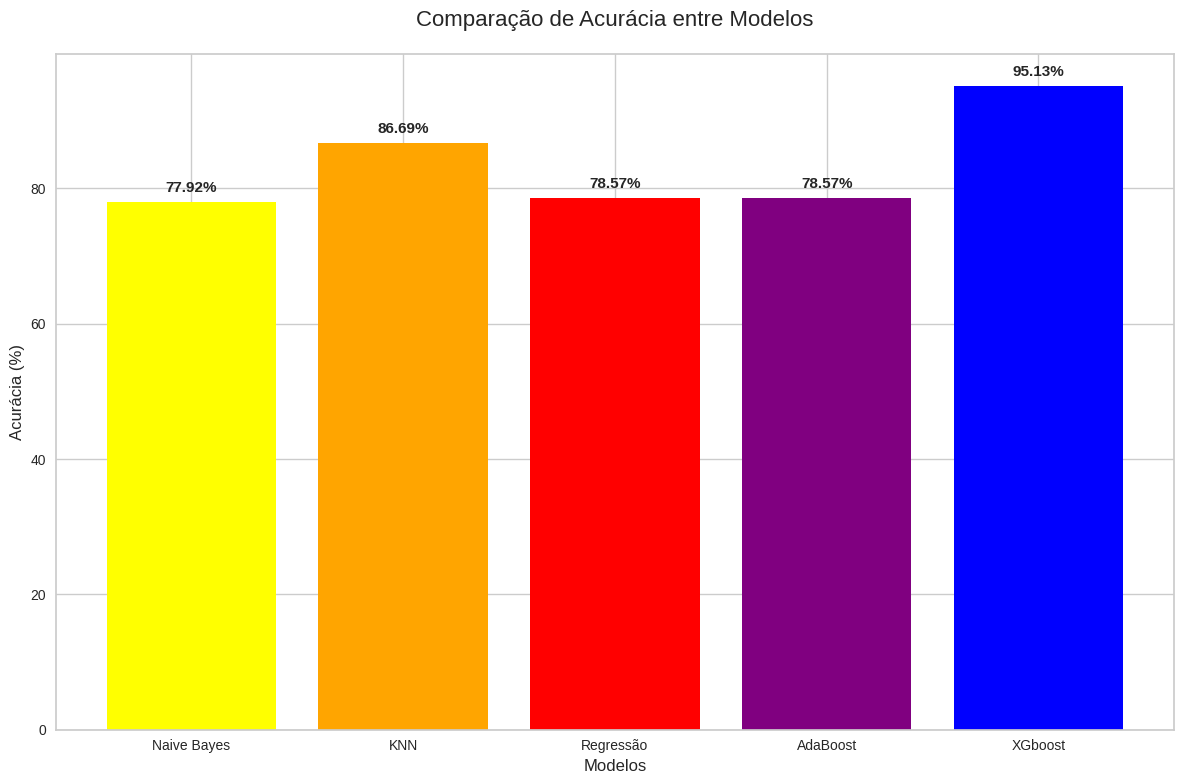

In [5]:
X_axis = [ 'Naive Bayes','KNN','Regressão','AdaBoost','XGboost']
Y_axis = [77.92,86.69,78.57,78.57,95.13]


colors = ['yellow', 'orange', 'red', 'purple','blue']



fig, ax = plt.subplots(figsize=(12, 8))


bars = ax.bar(X_axis, Y_axis, color=colors)


ax.bar_label(bars, fmt='%.2f%%', padding=5, fontsize=11, fontweight='bold')


ax.set_title('Comparação de Acurácia entre Modelos', fontsize=16, pad=20)
ax.set_xlabel("Modelos", fontsize=12)
ax.set_ylabel("Acurácia (%)", fontsize=12)



plt.tight_layout()


plt.show()

In [6]:
xgboost_model_filename = 'xgboost_cardiac_model.pkl'
with open(xgboost_model_filename, 'wb') as file:
    pickle.dump(model_xgboost, file)
print(f"Modelo XGBoost salvo com sucesso em '{xgboost_model_filename}'")

Modelo XGBoost salvo com sucesso em 'xgboost_cardiac_model.pkl'
